In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import torch
from neuralhedge.data.stochastic import BlackScholesDataset, simulate_time
from neuralhedge.data.base import ManagerDataset
import matplotlib.pyplot as plt
import numpy as np 
from neuralhedge.nn.blackschole import BlackScholesAlpha, BlackScholesMeanVarianceAlpha, BlackScholesMeanVarianceAlphaClip
from neuralhedge.nn.datamanager import Manager, WealthManager
from neuralhedge.nn.experiments import BS_efficient_frontier

In [6]:
mu = 0.1
sigma = 0.2
r = 0.01
n_sample = 5000
n_timestep = 60
dt = 1/12
ds_bs = BlackScholesDataset(n_sample = n_sample,
                        n_timestep = n_timestep,
                        dt = dt,
                        mu = mu,
                        sigma = sigma)
time = simulate_time(n_sample, dt, n_timestep, reverse = False)
bond = torch.exp(r*time)*100
paths = torch.cat([ds_bs.paths, bond], dim = -1)

info1 = torch.log(paths)
info2 = simulate_time(n_sample, dt, n_timestep, reverse = True)
info = torch.cat([info1,
                info2],
                dim = -1)
data = [paths, info]

In [10]:
mu = 0.1
sigma = 0.2
r = 0.01
sigma_strategy_list = []
sigma_range = np.linspace(0.1,0.4,9)
for sigma in sigma_range:
    strategy_dict = BS_efficient_frontier(mu, sigma, r)
    sigma_strategy_list.append(strategy_dict)

In [11]:
mu = 0.1
sigma = 0.2
r = 0.01
sigma_strategy_list_data = []
sigma_range = np.linspace(0.1,0.4,9)
for sigma in sigma_range:
    strategy_dict = BS_efficient_frontier(mu, sigma, r, data)
    sigma_strategy_list_data.append(strategy_dict)

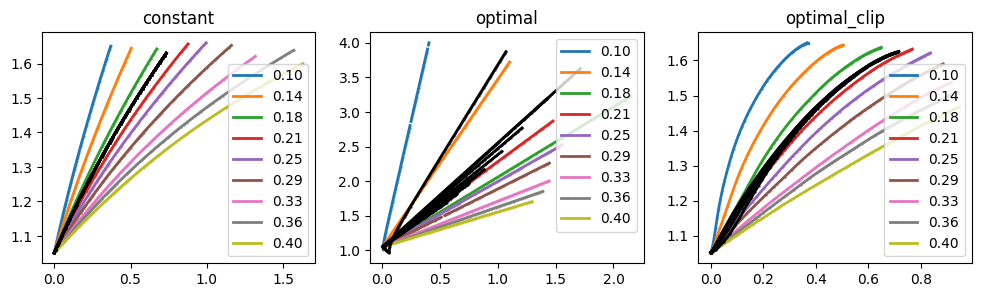

In [14]:
name_list = ['constant', 'optimal', 'optimal_clip']

fig, ax = plt.subplots(1,3,figsize = [12,3])
for ii, strategy_dict in enumerate(sigma_strategy_list):
    sigma = sigma_range[ii]
    for i,name in enumerate(name_list):
        mean_list, std_list = strategy_dict[name]
        ax[i].plot(mean_list,std_list,label = f'{sigma :.2f}',markersize = 1, marker='.', linestyle='-',linewidth=2)
        ax[i].set_title(name)
        ax[i].legend()


name_list = ['constant', 'optimal', 'optimal_clip']
for ii, strategy_dict in enumerate(sigma_strategy_list_data):
    sigma = sigma_range[ii]
    for i,name in enumerate(name_list):
        mean_list, std_list = strategy_dict[name]
        ax[i].plot(mean_list,std_list,label = 'data'+f'{sigma :.2f}',markersize = 1, marker='.', linestyle='-',linewidth=2, color = 'black')
        ax[i].set_title(name)
        # ax[i].legend()